In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
df = pd.read_csv('./input/creditcard_eval.csv')

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000
mean,94767.591585,-0.003438,0.002564,0.004116,-0.008819,0.003284,0.006601,-0.000788,-0.000364,-0.001382,-0.001914,0.005872,0.005588,0.002260,0.000591,-0.002080,0.004386,-0.007442,-0.002714,0.004540,0.002705,-0.002558,-0.003277,-0.001771,-0.001836,0.000387,0.001095,-0.001183,0.000617,88.191769,0.001854
std,47541.690238,1.956566,1.649993,1.507237,1.419446,1.372018,1.332032,1.230933,1.208079,1.095742,1.096587,1.016970,1.004082,0.989694,0.957375,0.912694,0.873169,0.845632,0.838508,0.813547,0.762177,0.735077,0.726838,0.625285,0.608236,0.520181,0.481596,0.400953,0.328831,248.284003,0.043017
min,0.000000,-37.558067,-63.344698,-33.680984,-5.683171,-35.182120,-23.496714,-37.060311,-73.216718,-11.126624,-23.228255,-4.453853,-18.431131,-5.791881,-18.049998,-4.498945,-12.432279,-23.241597,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-36.666000,-2.766638,-8.696627,-2.534330,-9.895244,-8.464609,0.000000,0.000000
25%,53989.000000,-0.921177,-0.594188,-0.883402,-0.855824,-0.687537,-0.766024,-0.554971,-0.207643,-0.642863,-0.538160,-0.751367,-0.398270,-0.639107,-0.422711,-0.581099,-0.465776,-0.489257,-0.502060,-0.448959,-0.210928,-0.228993,-0.546089,-0.162689,-0.356907,-0.317460,-0.325214,-0.071813,-0.053319,5.670000,0.000000
50%,84576.500000,0.009626,0.069818,0.179706,-0.028701,-0.050905,-0.269763,0.042157,0.022607,-0.052841,-0.094751,-0.025686,0.149427,-0.012415,0.051525,0.045621,0.072164,-0.067688,-0.006331,0.008455,-0.062041,-0.029934,0.002013,-0.010834,0.039970,0.017654,-0.049659,0.000422,0.011476,21.980000,0.000000
75%,139435.500000,1.313343,0.808596,1.023758,0.730327,0.616836,0.402048,0.572708,0.326392,0.593688,0.451240,0.745344,0.621895,0.659566,0.488766,0.644023,0.528423,0.394924,0.499961,0.461350,0.133204,0.184293,0.524382,0.147772,0.437471,0.350703,0.240168,0.090357,0.078605,76.647500,0.000000
max,172792.000000,2.404135,19.167239,4.101716,16.715537,34.099309,21.550496,36.877368,19.168327,10.370658,15.245686,11.277921,7.848392,4.316156,10.526766,5.667667,8.289890,9.207059,5.041069,4.555359,39.420904,27.202839,10.503090,15.626067,4.014444,5.541598,3.118588,9.879903,16.129609,19656.530000,1.000000


# 데이터 분포 확인하기

In [38]:
df_0 = df[df["Class"]== 0]
df_1 = df[df["Class"]== 1]
len(df_0), len(df_1)

(71070, 132)

V5
Min:-35.1821203113785   Mean:0.009533114323963043   Max:34.0993093435765


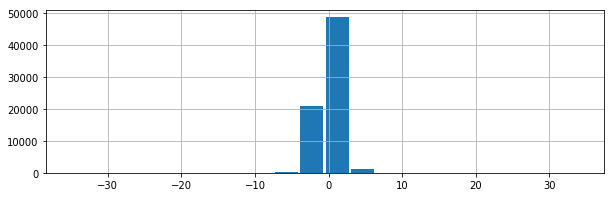

Min:-21.2258096535165   Mean:-3.361370695994305   Max:9.880564025528619


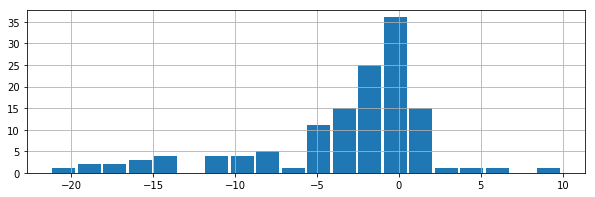

In [70]:
for column in list(df.columns):
    if column in ["V5"]:
        print(column)
        df_0[column].hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
        print('Min:{}   Mean:{}   Max:{}'.format(df_0[column].min(),df_0[column].mean(),df_0[column].max()))
        plt.show()
        df_1[column].hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
        print('Min:{}   Mean:{}   Max:{}'.format(df_1[column].min(),df_1[column].mean(),df_1[column].max()))
        plt.show()

# 데이터 정규화

Original       >>> Min:    -63.3446983175   Mean:      0.0025642215   Max:     19.1672390103
StandardScaler >>> Min:    -38.3927232768   Mean:     -0.0000000000   Max:     11.6150884248
MinMaxScaler   >>> Min:      0.0000000000   Mean:      0.7677345193   Max:      1.0000000000
MaxAbsScaler   >>> Min:     -1.0000000000   Mean:      0.0000404804   Max:      0.3025863177
RobustScaler   >>> Min:    -45.2062032154   Mean:     -0.0479431057   Max:     13.6139474693


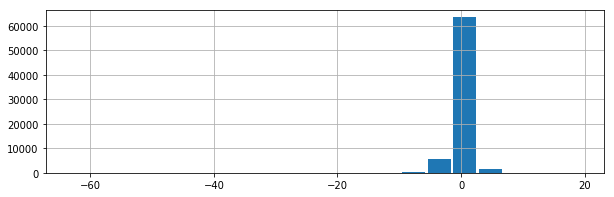

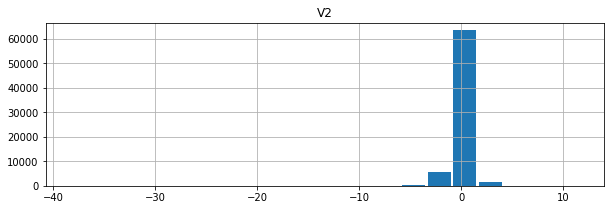

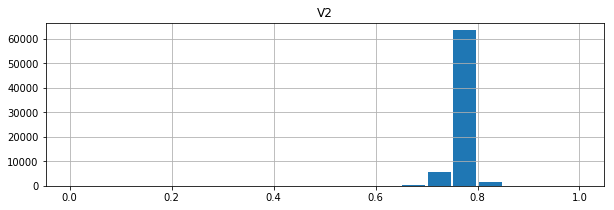

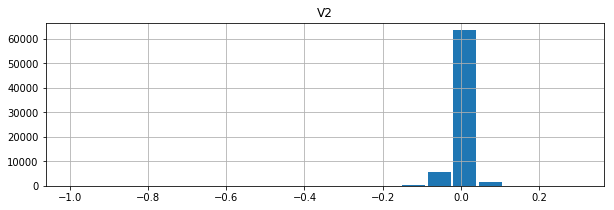

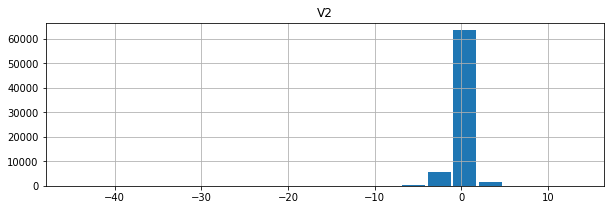

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
column = "V2"
scaler_stand  = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_maxabs = MaxAbsScaler()
scaler_robust = RobustScaler()

scaler_stand.fit(df[[column]])
scaler_minmax.fit(df[[column]])
scaler_maxabs.fit(df[[column]])
scaler_robust.fit(df[[column]])

out_stand = scaler_stand.transform(df[[column]])
out_minmax = scaler_minmax.transform(df[[column]])
out_maxabs = scaler_maxabs.transform(df[[column]])
out_robust = scaler_robust.transform(df[[column]])

out_stand = pd.DataFrame(out_stand, columns=[column], index=list(df.index.values))
out_minmax = pd.DataFrame(out_minmax, columns=[column], index=list(df.index.values))
out_maxabs = pd.DataFrame(out_maxabs, columns=[column], index=list(df.index.values))
out_robust = pd.DataFrame(out_robust, columns=[column], index=list(df.index.values))

print('Original       >>> Min:{:18.10f}   Mean:{:18.10f}   Max:{:18.10f}'.format(df[column].min(),df[column].mean(),df[column].max()))
print('StandardScaler >>> Min:{:18.10f}   Mean:{:18.10f}   Max:{:18.10f}'.format(out_stand[column].min(),out_stand[column].mean(),out_stand[column].max()))
print('MinMaxScaler   >>> Min:{:18.10f}   Mean:{:18.10f}   Max:{:18.10f}'.format(out_minmax[column].min(),out_minmax[column].mean(),out_minmax[column].max()))
print('MaxAbsScaler   >>> Min:{:18.10f}   Mean:{:18.10f}   Max:{:18.10f}'.format(out_maxabs[column].min(),out_maxabs[column].mean(),out_maxabs[column].max()))
print('RobustScaler   >>> Min:{:18.10f}   Mean:{:18.10f}   Max:{:18.10f}'.format(out_robust[column].min(),out_robust[column].mean(),out_robust[column].max()))

df[column].hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()
out_stand.hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()
out_minmax.hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()
out_maxabs.hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()
out_robust.hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()

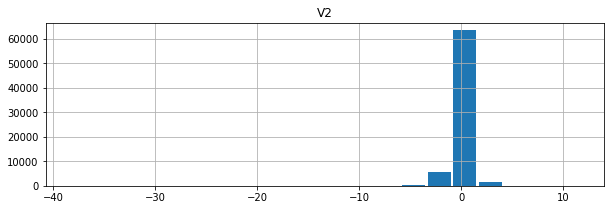

In [66]:
out_stand.hist(bins=20, figsize=(10, 3), xlabelsize=10, rwidth=0.9)
plt.show()

### negative/positive 건수

In [73]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 71202
    Positive: 132 (0.19% of total)

